Part 1: Data - Pre - Processing.

Importing the necessary libraries that are needed for data visualization and data analysis.

In [292]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

Importing the healthcare dataset obtained from 'Kaggle' into python.

In [293]:
data_set = pd.read_csv("healthcare-dataset-stroke-data.csv")
df = pd.DataFrame(data_set)

Visualizing the dataset.

In [294]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Dropping the 'id' column from the dataset since a patients 'id' only distinguishes them from other patients rather than 
helping our model that is going to be developed to predict the likelihood of stroke.

In [295]:
df.drop(['id'], axis = 1, inplace = True)

Visualizing the dataset.

In [296]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Renaming the columns.

In [297]:
df = df.rename(columns = {'gender': 'Gender', 'age': 'Age',
                          'hypertension': 'Hypertension',
                          'heart_disease': 'Heart_Disease',
                          'ever_married': 'Martial_Status',
                          'work_type': 'Work_Type',
                          'Residence_type': 'Residence_Type',
                          'avg_glucose_level': 'Avg_Glucose_Level',
                          'bmi': 'BMI', 'smoking_status': 
                          'Smoking_Status', 'stroke': 'Stroke'})

Visualizing the dataset.

In [298]:
df.head()

,Gender,Age,Hypertension,Heart_Disease,Martial_Status,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Checking if there is any null values in the dataset.

In [299]:
df.isnull().any().any()

True

Checking if there is any null values in each column.

In [300]:
df.isnull().any()

Gender               False
Age                  False
Hypertension         False
Heart_Disease        False
Martial_Status       False
Work_Type            False
Residence_Type       False
Avg_Glucose_Level    False
BMI                   True
Smoking_Status       False
Stroke               False
dtype: bool

Replacing the null values in the 'BMI' column with the average of that column.

In [301]:
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

Visualizing the dataset.

In [302]:
df.head()

,Gender,Age,Hypertension,Heart_Disease,Martial_Status,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


Checking how many 'unique' entries we have in each column.

In [303]:
print("Unique 'Gender' entries: {}".format(df['Gender'].unique()))
print("Unique 'Martial Status' entries: {}".format(df['Martial_Status'].unique()))
print("Unique 'Work Type' entries: {}".format(df['Work_Type'].unique()))
print("Unique 'Residence Type' entries: {}".format(df['Residence_Type'].unique()))
print("Unique 'Smoking Status' entries: {}".format(df['Smoking_Status'].unique()))

Unique 'Gender' entries: ['Male' 'Female' 'Other']
Unique 'Martial Status' entries: ['Yes' 'No']
Unique 'Work Type' entries: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique 'Residence Type' entries: ['Urban' 'Rural']
Unique 'Smoking Status' entries: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


Checking the value count of each column with unique entries.

In [304]:
df.Gender.value_counts()

Female    2994
Male      2115
Other        1
Name: Gender, dtype: int64

In [305]:
df.Martial_Status.value_counts()

Yes    3353
No     1757
Name: Martial_Status, dtype: int64

In [306]:
df.Work_Type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: Work_Type, dtype: int64

In [307]:
df.Residence_Type.value_counts()

Urban    2596
Rural    2514
Name: Residence_Type, dtype: int64

In [308]:
df.Smoking_Status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: Smoking_Status, dtype: int64

Since the count of 'other' in the 'gender' column = 1 we will change it into a Male.

In [309]:
df['Gender']=df['Gender'].replace('Other','Male')

Visualizing the gender column after the transformation.

In [310]:
df.Gender.value_counts()

Female    2994
Male      2116
Name: Gender, dtype: int64

Converting categorical data into numerical data.

In [311]:
from sklearn.preprocessing import LabelEncoder
cat_encoder = LabelEncoder()
df['Gender'] = cat_encoder.fit_transform(df['Gender'])
df['Martial_Status'] = cat_encoder.fit_transform(df['Martial_Status'])
df['Work_Type'] = cat_encoder.fit_transform(df['Work_Type'])
df['Residence_Type'] = cat_encoder.fit_transform(df['Residence_Type'])
df['Smoking_Status'] = cat_encoder.fit_transform(df['Smoking_Status'])

Visualizing the dataset with the above applied transformation.

In [312]:
df.head()

,Gender,Age,Hypertension,Heart_Disease,Martial_Status,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


Part 2: Data Analysis.

Checking for any outliers using a Box Plot.

<AxesSubplot:ylabel='Hypertension'>

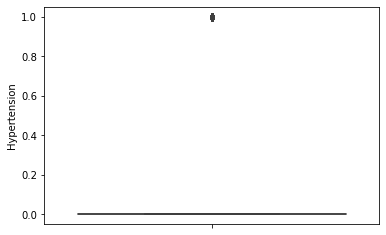

In [313]:
sns.boxplot(y = df['Hypertension'])

<AxesSubplot:ylabel='Heart_Disease'>

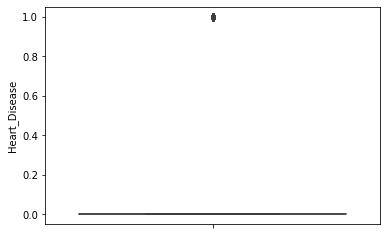

In [314]:
sns.boxplot(y = df['Heart_Disease'])

<AxesSubplot:ylabel='Avg_Glucose_Level'>

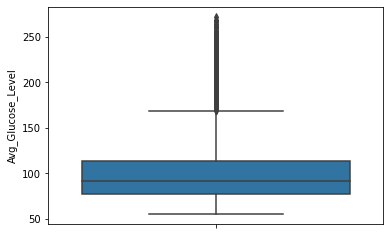

In [315]:
sns.boxplot(y = df['Avg_Glucose_Level'])

<AxesSubplot:ylabel='BMI'>

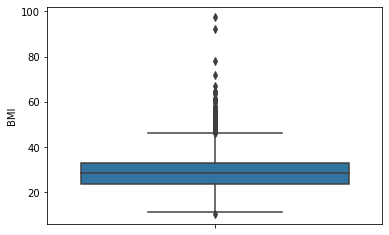

In [316]:
sns.boxplot(y = df['BMI'])

Visualizing the distribution of data using a pie chart.

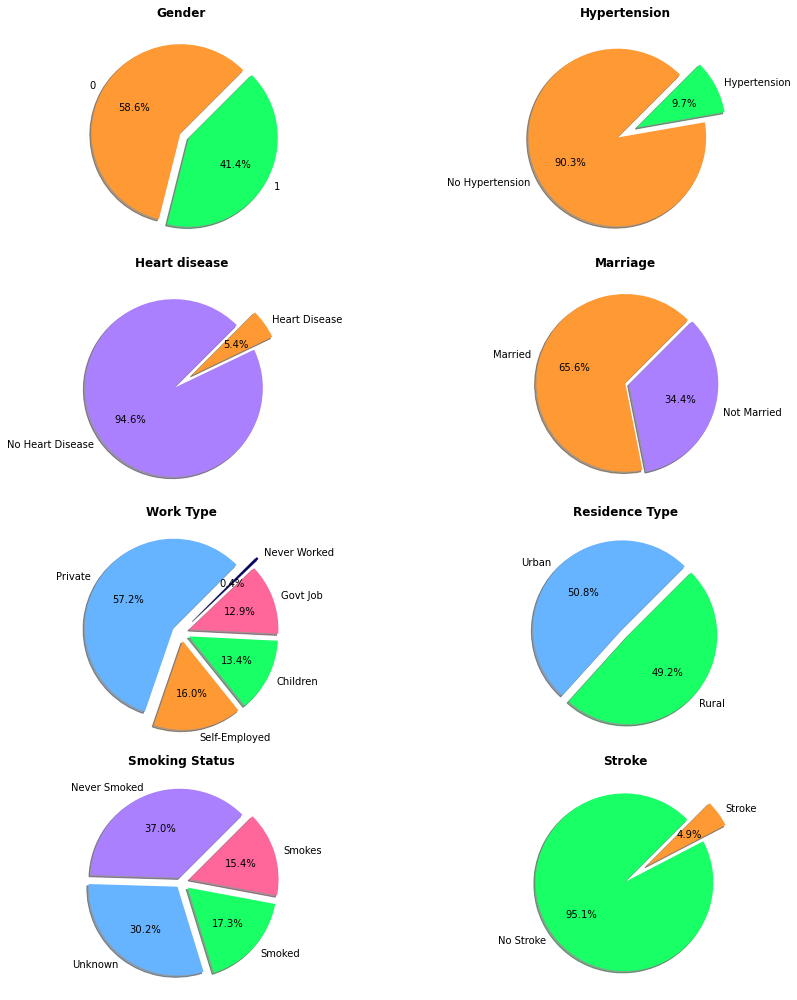

In [317]:
fig, ax = plt.subplots(4,2, figsize = (14,14))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = ax

labels = df['Gender'].value_counts().index.tolist()[:2]
values = df['Gender'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#FF9933','#19FF66'],shadow=True, startangle=45,explode=[0.01, 0.1])
ax1.set_title("Gender", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Hypertension", "Hypertension"]
values = df['Hypertension'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#FF9933','#19FF66'],shadow=True,startangle=45,explode=[0.1, 0.15])
ax2.set_title("Hypertension", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Heart Disease", "Heart Disease"]
values = df['Heart_Disease'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AA80FF','#FF9933'],shadow=True, startangle=45,explode=[0.1, 0.15])
ax3.set_title("Heart disease", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Married", "Not Married"]
values = df['Martial_Status'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#FF9933','#AA80FF'],shadow=True,startangle=45,explode=[0, 0.05])
ax4.set_title("Marriage", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Private", "Self-Employed", "Children", "Govt Job", "Never Worked"]
values = df['Work_Type'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#66b3ff','#FF9933','#19FF66','#FF6699','#000066'],shadow=True, startangle=45,explode=[0.1, 0.1, 0.1, 0.1, 0.2])
ax5.set_title("Work Type", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Urban", "Rural"]
values = df['Residence_Type'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#66b3ff','#19FF66'],shadow=True,startangle=45,explode=[0.05, 0.05])
ax6.set_title("Residence Type", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Never Smoked", "Unknown", "Smoked", "Smokes"]
values = df['Smoking_Status'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.05, 0.07, 0.1, 0.1],colors=['#AA80FF','#66b3ff','#19FF66','#FF6699'])
ax7.set_title("Smoking Status", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Stroke", "Stroke"]
values = df['Stroke'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.01, 0.3],colors=['#19FF66','#FF9933'])
ax8.set_title("Stroke", fontdict={'fontsize': 12},fontweight ='bold')

plt.tight_layout()
plt.show()

Visualizing the distribution of data using a bar graph.

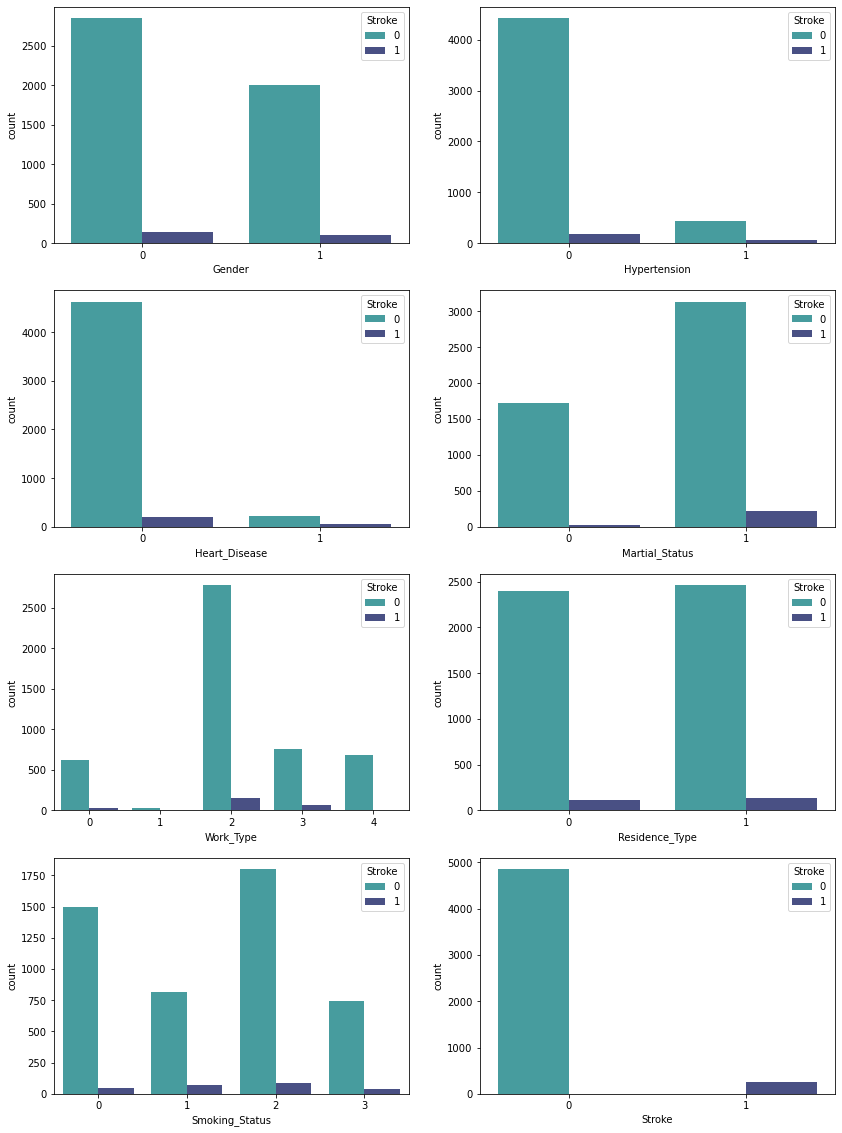

In [318]:
df_st=['Gender','Hypertension','Heart_Disease','Martial_Status',
       'Work_Type','Residence_Type','Smoking_Status', 'Stroke']
fig, axs = plt.subplots(4, 2, figsize=(14,20))
axs = axs.flatten()
for i, col_name in enumerate(df_st):
    sns.countplot(x=col_name, data=df, ax=axs[i], 
                  hue =df['Stroke'],palette='mako_r')

Visualizing the correlation matrix.

In [319]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Gender,Age,Hypertension,Heart_Disease,Martial_Status,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
Gender,1.000000,-0.027924,0.021143,0.085617,-0.030483,0.056532,-0.006340,0.054902,-0.025797,-0.062496,0.009027
Age,-0.027924,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.325942,0.265199,0.245257
Hypertension,0.021143,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.160189,0.111038,0.127904
Heart_Disease,0.085617,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.038899,0.048460,0.134914
Martial_Status,-0.030483,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.335705,0.259647,0.108340
Work_Type,0.056532,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.299448,-0.305927,-0.032316
Residence_Type,-0.006340,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000120,0.008237,0.015458
Avg_Glucose_Level,0.054902,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.168751,0.063437,0.131945
BMI,-0.025797,0.325942,0.160189,0.038899,0.335705,-0.299448,-0.000120,0.168751,1.000000,0.219148,0.038947
Smoking_Status,-0.062496,0.265199,0.111038,0.048460,0.259647,-0.305927,0.008237,0.063437,0.219148,1.000000,0.028123


Dealing with 'Imbalanced Data':

First, we visualize the percentage of 'No Stroke' and 'Stroke' data.

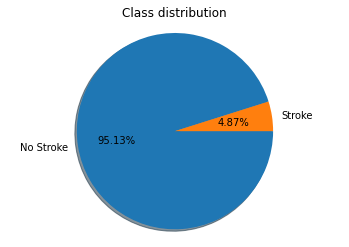

Total samples associated with no stroke: 4861
Total samples associated with stroke: 249


In [320]:
imb_class = df['Stroke'].value_counts()
imb_class_names = ['No Stroke','Stroke']
fig, ax = plt.subplots()
ax.pie(imb_class, labels=imb_class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')
ax.set_title('Class distribution')
plt.show()
print("Total samples associated with no stroke: {}".format(imb_class[0]))
print("Total samples associated with stroke: {}".format(imb_class[1]))

Using 'SMOTE' to resample the above imbalanced data using the 
'minority' technique.

In [321]:
from imblearn.over_sampling import SMOTE
smote_imb = SMOTE(sampling_strategy='minority')

X, Y = smote_imb.fit_resample(df.loc[:,df.columns!='Stroke'], df['Stroke'])

Visualizing values of X and Y.

In [322]:
print(X)
print(Y)

      Gender        Age  Hypertension  Heart_Disease  Martial_Status  \
0          1  67.000000             0              1               1   
1          0  61.000000             0              0               1   
2          1  80.000000             0              1               1   
3          0  49.000000             0              0               1   
4          0  79.000000             1              0               1   
...      ...        ...           ...            ...             ...   
9717       1  81.918070             0              0               1   
9718       0  77.624418             0              0               1   
9719       0  69.460246             0              0               1   
9720       0  38.367054             0              0               1   
9721       0  73.291740             1              0               1   

      Work_Type  Residence_Type  Avg_Glucose_Level        BMI  Smoking_Status  
0             2               1         228.690000  36.

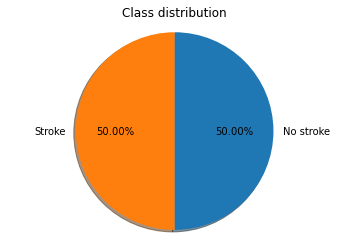

Total samples associated with no stroke: 4861
Total samples associated with stroke: 4861


In [323]:
_, imb_class_2 = np.unique(Y, return_counts=True)
imb_class_names_2 = ['No stroke', 'Stroke']
fig, ax = plt.subplots()
ax.pie(imb_class_2, labels=imb_class_names_2, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)

ax.axis('equal')
ax.set_title('Class distribution')
plt.show()
print("Total samples associated with no stroke: {}".format(imb_class_2[0]))
print("Total samples associated with stroke: {}".format(imb_class_2[1]))

Part 3: Data Classification.

Splitting the dataset into training and testing splits for predicition.

In [324]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

Scaling the training and testing splits.

In [325]:
from sklearn.preprocessing import StandardScaler
normal_to_scaler = StandardScaler()

x_train = normal_to_scaler.fit_transform(x_train)
x_test = normal_to_scaler.fit_transform(x_test)

Training and Building Models.

Method 1: Logisitc Regression

Defining the search space and tuning the hyper parameters.

In [326]:
param_grid_log = { "penalty" : ['l1', 'l2'], 'C' : np.logspace(-4,4,20),}

In [327]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
LR = LogisticRegression()
grid_lr = GridSearchCV(LR,param_grid_log,cv = 10)
grid_lr.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

Displaying the best parameters.

In [328]:
grid_lr.best_score_

0.8063552719079711

In [329]:
grid_lr.best_params_

{'C': 0.08858667904100823, 'penalty': 'l2'}

In [330]:
grid_lr.best_estimator_

LogisticRegression(C=0.08858667904100823)

Now we do the exact same thing as above but instead use RandomizedSearchCV.

In [331]:
from sklearn.model_selection import RandomizedSearchCV
random_lr = RandomizedSearchCV(LR,param_grid_log,cv = 10)
random_lr.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2']})

Displaying the best parameters.

In [332]:
random_lr.best_score_

0.8057125983861202

In [333]:
random_lr.best_params_

{'penalty': 'l2', 'C': 1.623776739188721}

In [334]:
random_lr.best_estimator_

LogisticRegression(C=1.623776739188721)

In [335]:
lr = LogisticRegression(C=1.623776739188721)
lr.fit(x_train,y_train)
y_pred_1=lr.predict(x_test)

In [336]:
print(y_pred_1)

[0 0 0 ... 0 0 1]


In [337]:
y_pred_1_prob = lr.predict_proba(x_test)
y_pred_1_prob

array([[0.99174893, 0.00825107],
       [0.59572249, 0.40427751],
       [0.67240845, 0.32759155],
       ...,
       [0.71452785, 0.28547215],
       [0.85286621, 0.14713379],
       [0.36737844, 0.63262156]])

Obtaining the accuracy score - precision score - recall score -
F1 score of the model:

In [338]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

acc_log = accuracy_score(y_test, y_pred_1)
precision_log = precision_score(y_test,y_pred_1)
recall_log = recall_score(y_test, y_pred_1)
f1_log = f1_score(y_test, y_pred_1)

print(acc_log)
print(precision_log)
print(recall_log)
print(f1_log)

0.8025706940874036
0.787819253438114
0.8268041237113402
0.8068410462776658


Visualizing the Confusion Matrix:

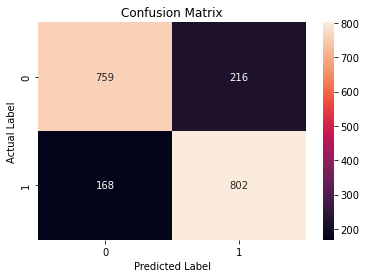

In [339]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_1)
import seaborn as sns
import matplotlib.pyplot as plt

class_label = ["0", "1"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Method 2: Random Forest Classification:

We follow the exact same steps as we followed with logistic regression. Just note that these are 'parameters' that best worked for us giving the highest amount of accuracy. For other random states and datasets this might be different.

In [193]:
from sklearn.ensemble import RandomForestClassifier

In [195]:
n_estimators = [int(X) for X in np.linspace(start = 10, stop = 80, num = 20)]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
max_depth = [2,4, None]
max_features = ['auto','sqrt']
bootstrap = [True, False]

search_space = {'n_estimators': n_estimators, 'min_samples_split': min_samples_split, 
                'min_samples_leaf': min_samples_leaf, 'max_depth': max_depth,
                'max_features': max_features, 'bootstrap': bootstrap}

In [196]:
random_forest_class = RandomForestClassifier()

random_forest_grid = GridSearchCV(random_forest_class, search_space, cv = 3, verbose = 3)

random_forest_grid.fit(x_train, y_train)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits
[CV 1/3] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.785 total time=   0.0s
[CV 2/3] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.805 total time=   0.0s
[CV 3/3] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.792 total time=   0.0s
[CV 1/3] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=13;, score=0.788 total time=   0.0s
[CV 2/3] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=13;, score=0.789 total time=   0.0s
[CV 3/3] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=13;, score=0.811 total time=   0.0s
[CV 1/3] END bootstrap=True, m

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 13, 17, 21, 24, 28, 32, 35, 39,
                                          43, 46, 50, 54, 57, 61, 65, 68, 72,
                                          76, 80]},
             verbose=3)

In [197]:
random_forest_grid.best_score_

0.9376362385117258

In [198]:
random_forest_grid.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 46}

In [199]:
random_forest_grid.best_estimator_

RandomForestClassifier(bootstrap=False, max_features='sqrt', n_estimators=46)

In [200]:
rf = RandomForestClassifier(bootstrap = False, max_features = 'sqrt', n_estimators = 80)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_features='sqrt', n_estimators=80)

In [201]:
y_pred_2 = rf.predict(x_test)
print(y_pred_2)

[0 1 0 ... 1 0 1]


In [203]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

acc_rf = accuracy_score(y_test, y_pred_2)
precision_rf = precision_score(y_test, y_pred_2)
recall_rf = recall_score(y_test, y_pred_2)
f1_rf = f1_score(y_test, y_pred_2)

print(acc_rf)
print(precision_rf)
print(recall_rf)
print(f1_rf)

0.9408740359897172
0.9366700715015321
0.945360824742268
0.9409953822473063


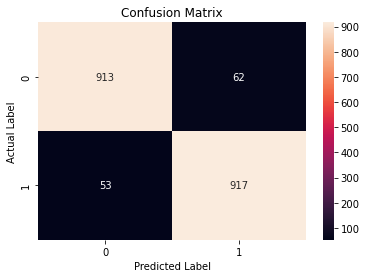

In [204]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_2)
import seaborn as sns
import matplotlib.pyplot as plt

class_label = ["0", "1"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Method 3: Decision Tree

Binning the age column.

In [340]:
bin_age = [40,50,60,70,80,90]
category_age = ['40s', '50s', '60s', '70s','80s']
df['Age_Binned'] = pd.cut(df['Age'], bins=bin_age, labels=category_age)
df = df.drop(['Age'], axis = 1)

Visualizing the dataset.

In [341]:
df.head()

,Gender,Hypertension,Heart_Disease,Martial_Status,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke,Age_Binned
0,1,0,1,1,2,1,228.69,36.600000,1,1,60s
1,0,0,0,1,3,0,202.21,28.893237,2,1,60s
2,1,0,1,1,2,0,105.92,32.500000,2,1,70s
3,0,0,0,1,2,1,171.23,34.400000,3,1,40s
4,0,1,0,1,3,0,174.12,24.000000,2,1,70s


Binning the average glucose level column.

In [342]:
bin_glucoseLevel = [50,100,150,200,250,275]
category_glucoseLevel = ['<100', '100-150', '150-200', '200-250','>250']
df['Glucose_Level_Binned'] = pd.cut(df['Avg_Glucose_Level'], bins=bin_glucoseLevel, labels=category_glucoseLevel)
df = df.drop(['Avg_Glucose_Level'], axis = 1)

Visualizing the dataset.

In [343]:
df.head()

,Gender,Hypertension,Heart_Disease,Martial_Status,Work_Type,Residence_Type,BMI,Smoking_Status,Stroke,Age_Binned,Glucose_Level_Binned
0,1,0,1,1,2,1,36.600000,1,1,60s,200-250
1,0,0,0,1,3,0,28.893237,2,1,60s,200-250
2,1,0,1,1,2,0,32.500000,2,1,70s,100-150
3,0,0,0,1,2,1,34.400000,3,1,40s,150-200
4,0,1,0,1,3,0,24.000000,2,1,70s,150-200


Binning the BMI column.

For some reason python was not happy with us naming 'bmi' as 'BMI' so it was not letting us bin the variable so we had to change it again.

In [344]:
df = df.rename(columns = {'BMI': 'bmi'})

In [345]:
df.head()

,Gender,Hypertension,Heart_Disease,Martial_Status,Work_Type,Residence_Type,bmi,Smoking_Status,Stroke,Age_Binned,Glucose_Level_Binned
0,1,0,1,1,2,1,36.600000,1,1,60s,200-250
1,0,0,0,1,3,0,28.893237,2,1,60s,200-250
2,1,0,1,1,2,0,32.500000,2,1,70s,100-150
3,0,0,0,1,2,1,34.400000,3,1,40s,150-200
4,0,1,0,1,3,0,24.000000,2,1,70s,150-200


In [346]:
bin_bmi = [10,20,30,40,50,60,70,80,90]
category_bmi = ['<20', '20-30', '30-40', '40-50','50-60','60-70','70-80','>80']
df['BMI_Binned'] = pd.cut(df['bmi'], bins=bin_bmi, labels=category_bmi)
df = df.drop(['bmi'], axis = 1)

Visualizing the dataset.

In [347]:
df.head()

,Gender,Hypertension,Heart_Disease,Martial_Status,Work_Type,Residence_Type,Smoking_Status,Stroke,Age_Binned,Glucose_Level_Binned,BMI_Binned
0,1,0,1,1,2,1,1,1,60s,200-250,30-40
1,0,0,0,1,3,0,2,1,60s,200-250,20-30
2,1,0,1,1,2,0,2,1,70s,100-150,30-40
3,0,0,0,1,2,1,3,1,40s,150-200,30-40
4,0,1,0,1,3,0,2,1,70s,150-200,20-30


In [348]:
X = df.drop(["Stroke"], axis=1)
Y = df["Stroke"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

In [349]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier()
param_grid_dt = {'max_leaf_nodes' : [2,10,15,20,30], "max_depth" : [1,2,3,4,5,6,7,8,9,10]}
grid_dt = GridSearchCV(DT_classifier,param_grid_dt,cv = 10)
grid_dt.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [2, 10, 15, 20, 30]})

In [350]:
grid_dt.best_score_

0.9542571551848121

In [351]:
grid_dt.best_params_

{'max_depth': 1, 'max_leaf_nodes': 2}

In [352]:
grid_dt.best_estimator_

DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)

In [353]:
random_dt = RandomizedSearchCV(DT_classifier,param_grid_dt,cv = 10)
random_dt.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_leaf_nodes': [2, 10, 15, 20, 30]})

In [354]:
random_dt.best_score_

0.9542571551848121

In [355]:
random_dt.best_params_

{'max_leaf_nodes': 30, 'max_depth': 2}

In [356]:
random_dt.best_estimator_

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=30)

In [357]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt = DT_classifier.fit(x_train, y_train)

In [358]:
y_pred_3 = dt.predict(x_test)

In [359]:
print(y_pred_3)

[0 0 0 ... 0 0 0]


In [360]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

acc_dt = accuracy_score(y_test, y_pred_3)
precision_dt = precision_score(y_test, y_pred_3)
recall_dt = recall_score(y_test, y_pred_3)
f1_dt = f1_score(y_test, y_pred_3)

print(acc_dt)
print(precision_dt)
print(recall_dt)
print(f1_dt)

0.9168297455968689
0.15151515151515152
0.08064516129032258
0.10526315789473684


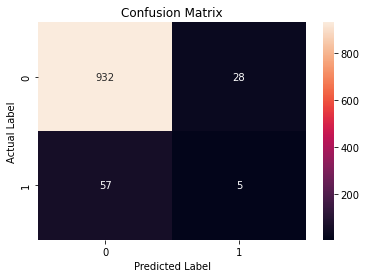

In [361]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_3)
import seaborn as sns
import matplotlib.pyplot as plt

class_label = ["0", "1"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Method 4: KNN

In [380]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [381]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [382]:
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


Onehotencode vs label encoder. Label encoder is better used when there's a significance to the order. For our variables
that doesn't exist so I believe Onehotencoding will be better. We can drop ID, gender and resident type can be made binary, onehotencoding binary variable is redundant and work_type and smoking_status can be onehotencoded.

In [383]:
df.drop(['id'], axis = 1, inplace = True)

In [384]:
df.shape

(5110, 11)

In [385]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [386]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [387]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [388]:
df.groupby('gender').count()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,,,,,,,,,,
Female,2994,2994,2994,2994,2994,2994,2994,2897,2994,2994
Male,2115,2115,2115,2115,2115,2115,2115,2011,2115,2115
Other,1,1,1,1,1,1,1,1,1,1


One gender entry is 'other' easiest way to deal with this is removal.

In [389]:
df.drop(3116, inplace = True)

In [390]:
df.groupby('gender').count()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,,,,,,,,,,
Female,2994,2994,2994,2994,2994,2994,2994,2897,2994,2994
Male,2115,2115,2115,2115,2115,2115,2115,2011,2115,2115


Binary gender and residence type.

In [391]:
def binary_gender(x):
    if x == 'Male':
        return 0
    else:
        return 1
    
def binary_resi(x):
    if x == 'Urban':
        return 0
    else:
        return 1
def married(x):
    if x == 'Yes':
        return 0
    else:
        return 1

In [392]:
df['gender'] = df['gender'].apply(binary_gender).astype(int)
df['Residence_type'] = df['Residence_type'].apply(binary_resi).astype(int)
df['ever_married'] = df['ever_married'].apply(married).astype(int)

In [393]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Onehotencode smoking_status and work_type using pd.get_dummies.

In [394]:
df2 = pd.get_dummies(data = df['smoking_status'], drop_first = False).astype(int)
df3 = pd.get_dummies(data = df['work_type'], drop_first = False).astype(int)

Tried with label encoder, classification worse.

Drop work_type and smoking status.

In [395]:
df.drop(['smoking_status'], axis = 1, inplace = True)
df.drop(['work_type'], axis = 1, inplace = True)

In [396]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,0,67.0,0,1,0,0,228.69,36.6,1
1,1,61.0,0,0,0,1,202.21,NaN,1
2,0,80.0,0,1,0,1,105.92,32.5,1


Combine df, df2, df3.

In [397]:
df4 = pd.concat([df,df2,df3], axis = 1)

In [398]:
df4.head(3)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Unknown,formerly smoked,never smoked,smokes,Govt_job,Never_worked,Private,Self-employed,children
0,0,67.0,0,1,0,0,228.69,36.6,1,0,1,0,0,0,0,1,0,0
1,1,61.0,0,0,0,1,202.21,NaN,1,0,0,1,0,0,0,0,1,0
2,0,80.0,0,1,0,1,105.92,32.5,1,0,0,1,0,0,0,1,0,0


Checking for any Null values.

In [399]:
df4.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
Residence_type         0
avg_glucose_level      0
bmi                  201
stroke                 0
Unknown                0
formerly smoked        0
never smoked           0
smokes                 0
Govt_job               0
Never_worked           0
Private                0
Self-employed          0
children               0
dtype: int64

In [400]:
df4 = df4.fillna(df[['bmi']].mean())

In [401]:
df4.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
stroke               0
Unknown              0
formerly smoked      0
never smoked         0
smokes               0
Govt_job             0
Never_worked         0
Private              0
Self-employed        0
children             0
dtype: int64

In [402]:
from sklearn.model_selection import train_test_split

In [403]:
X = df4.drop(['stroke'], axis = 1)
y = df4['stroke']

In [404]:
X

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Unknown,formerly smoked,never smoked,smokes,Govt_job,Never_worked,Private,Self-employed,children
0,0,67.0,0,1,0,0,228.69,36.60000,0,1,0,0,0,0,1,0,0
1,1,61.0,0,0,0,1,202.21,28.89456,0,0,1,0,0,0,0,1,0
2,0,80.0,0,1,0,1,105.92,32.50000,0,0,1,0,0,0,1,0,0
3,1,49.0,0,0,0,0,171.23,34.40000,0,0,0,1,0,0,1,0,0
4,1,79.0,1,0,0,1,174.12,24.00000,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,0,0,83.75,28.89456,0,0,1,0,0,0,1,0,0
5106,1,81.0,0,0,0,0,125.20,40.00000,0,0,1,0,0,0,0,1,0
5107,1,35.0,0,0,0,1,82.99,30.60000,0,0,1,0,0,0,0,1,0
5108,0,51.0,0,0,0,1,166.29,25.60000,0,1,0,0,0,0,1,0,0


In [405]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42)

In [406]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

scal = StandardScaler()
scld_X_train = scal.fit_transform(X_train)
scld_X_test = scal.transform(X_test)
standard scaler made classifications worse

In [407]:
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

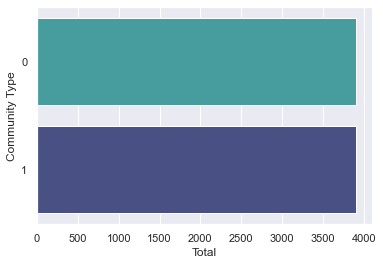

In [408]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df, palette="mako_r")
plt.ylabel('Community Type')
plt.xlabel('Total')
plt.show()

In [409]:
from sklearn.neighbors import KNeighborsClassifier

In [410]:
a=np.array([])
b=np.array([])
for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN.fit(X_train, y_train)
    pred1 = KNN.predict(X_test)
    a=np.append(a, (round(np.sum(pred1 != y_test)/len(y_test), 4)))
    b=np.append(b, i)

Text(0.5, 1.0, 'Error vs K value')

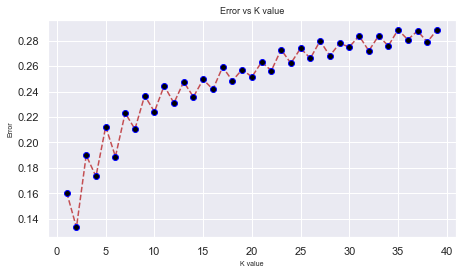

In [411]:
plt.figure(figsize=(7.3,4))
sns.set_style("darkgrid")
plt.plot(b, a, '--o', markeredgecolor = 'blue', markerfacecolor = 'black', color = 'r')
plt.xlabel('K value', fontsize=7)
plt.ylabel('Error', fontsize=7)
plt.title('Error vs K value', fontsize = 9)

In [412]:
KNN2 = KNeighborsClassifier(n_neighbors=2)

In [413]:
KNN2.fit(X_train, y_train)
pred2 = KNN2.predict(X_test)

In [414]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

acc_knn = accuracy_score(y_test, pred2)
precision_knn = precision_score(y_test, pred2)
recall_knn = recall_score(y_test, pred2)
f1_knn = f1_score(y_test, pred2)

print(acc_knn)
print(precision_knn)
print(recall_knn)
print(f1_knn)

0.8669275929549902
0.20161290322580644
0.4032258064516129
0.26881720430107525


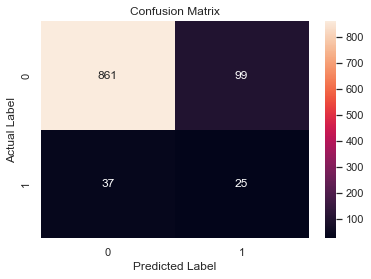

In [415]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, pred2)
import seaborn as sns
import matplotlib.pyplot as plt

class_label = ["0", "1"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Visualizing various scores of different ML models used.

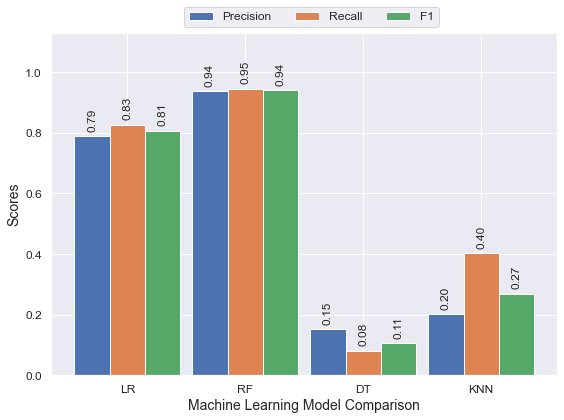

In [416]:
ml_names = ['LR', 'RF', 'DT', 'KNN']
prec_all = [precision_log, precision_rf, precision_dt, precision_knn]
rec_all = [recall_log, recall_rf, recall_dt, recall_knn]
f1_all = [f1_log, f1_rf, f1_dt, f1_knn]

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5), 
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')

width = 0.3
r1 = np.arange(len(ml_names)) 
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

fig, ax = plt.subplots(figsize=(8,6))
bar1 = ax.bar(r1, prec_all, width, label='Precision')
bar2 = ax.bar(r2, rec_all, width, label='Recall')
bar3 = ax.bar(r3, f1_all, width, label='F1')
ax.set_ylim([0,1.13])
ax.set_ylabel('Scores',fontsize=14)
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model Comparison",fontsize=14)
ax.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
plt.show()

Visualizing the accuracy score of different ML models used.

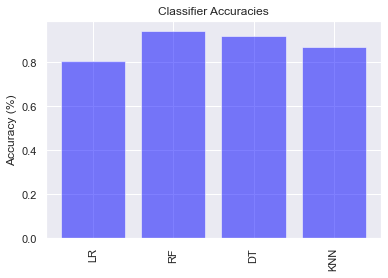

In [417]:
predictors_group = ('LR', 'RF', 'DT', 'KNN')
x_pos = np.arange(len(predictors_group))
accuracies1 = [acc_log, acc_rf, acc_dt, acc_knn]
    
plt.bar(x_pos, accuracies1, align='center', alpha=0.5, color='blue')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)')
plt.title('Classifier Accuracies')
plt.show()

In [419]:
import pickle

with open('model.pickle', 'wb') as f:
    pickle.dump(LR,f)